In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential,Model,load_model
from keras.layers import Dense,Activation,Input
from keras.utils import np_utils

In [2]:
train = pd.read_csv("./Dataset/fashion-mnist_train.csv")

In [44]:

train.shape

(60000, 785)

In [6]:
X=train[:,1:]
Y=train[:,0]

X=X/255.0
Y=np_utils.to_categorical(Y)

In [7]:
print (X.shape,Y.shape)

(60000, 784) (60000, 10)


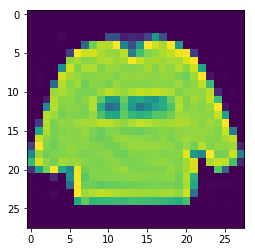

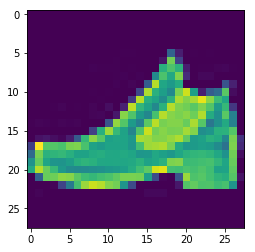

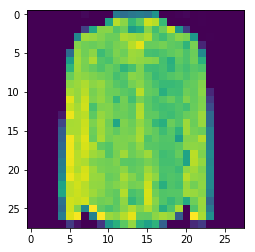

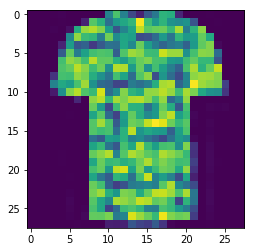

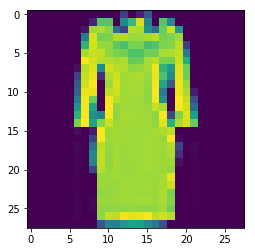

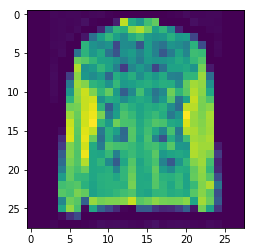

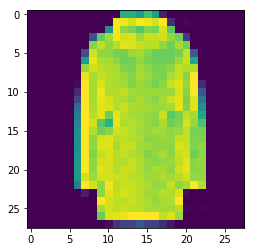

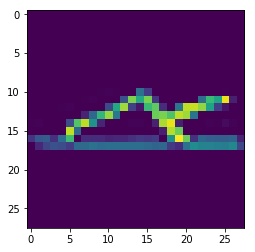

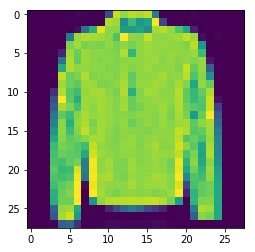

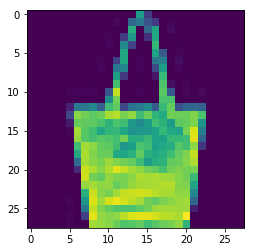

In [10]:
for ix in range(10):
    x=X[ix].reshape(28,28)
    plt.imshow(x)
    plt.show()

In [18]:
#Using Sequential API

model=Sequential()
model.add(Dense(256,input_dim=(784)))
model.add(Activation('relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Using Functional API

inp = Input(shape=(784,))
h1= Dense(256,activation='relu')(inp)
h2=  Dense(64,activation='relu')(h1)
h2 = Dense(10)(h2)

out = Activation('softmax')(h2)

model = Model(inputs=inp,outputs=out)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_11 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
hist = model.fit(X,Y,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 72us/step - loss: 0.6096 - acc: 0.7864 - val_loss: 0.4559 - val_acc: 0.8386
Epoch 2/20
48000/48000 [==============================] - 3s 64us/step - loss: 0.4154 - acc: 0.8540 - val_loss: 0.4005 - val_acc: 0.8585
Epoch 3/20
48000/48000 [==============================] - 3s 67us/step - loss: 0.3697 - acc: 0.8690 - val_loss: 0.3715 - val_acc: 0.8703
Epoch 4/20
48000/48000 [==============================] - 3s 63us/step - loss: 0.3428 - acc: 0.8772 - val_loss: 0.3899 - val_acc: 0.8577
Epoch 5/20
48000/48000 [==============================] - 3s 63us/step - loss: 0.3213 - acc: 0.8831 - val_loss: 0.3429 - val_acc: 0.8761
Epoch 6/20
48000/48000 [==============================] - 3s 63us/step - loss: 0.3060 - acc: 0.8884 - val_loss: 0.3601 - val_acc: 0.8682
Epoch 7/20
48000/48000 [==============================] - 3s 70us/step - loss: 0.2935 - acc: 0.8928 - val_loss: 0.3437 - val_acc

In [22]:
model.save("NN_fmnist.h5")

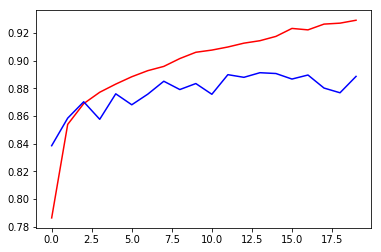

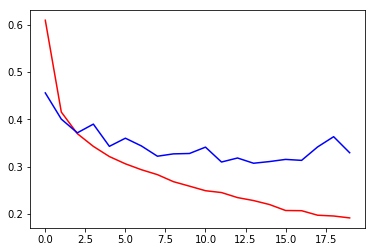

In [23]:
plt.figure(1)
plt.plot(hist.history['acc'], color = 'r')
plt.plot(hist.history['val_acc'], color = 'b')

plt.figure(2)
plt.plot(hist.history['loss'], color = 'r')
plt.plot(hist.history['val_loss'], color = 'b')

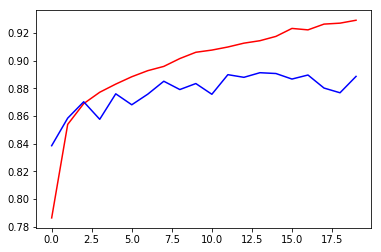

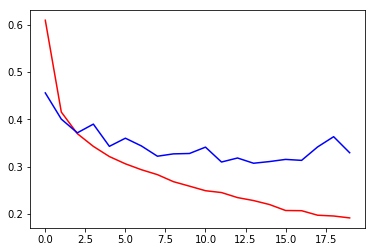

In [24]:
plt.figure(1)
plt.plot(hist.history['acc'], color = 'r')
plt.plot(hist.history['val_acc'], color = 'b')

plt.figure(2)
plt.plot(hist.history['loss'], color = 'r')
plt.plot(hist.history['val_loss'], color = 'b')

In [29]:
l_model = load_model("./Dataset/NN_fmnist.h5")

l_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_11 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [30]:
X1 = X[0,:].reshape(1,-1)
X1.shape

(1, 784)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


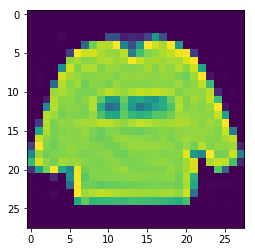

In [32]:
plt.imshow(X1.reshape(28,28))
print (Y[0])

In [33]:
np.argmax(model.predict(X1))

2

In [45]:
#Test
test = pd.read_csv("./Dataset/fashion-mnist_test.csv")

In [46]:
test=test.values

In [47]:
test.shape

(10000, 785)

In [50]:
Xtest = test[:,1:]
Xtest.shape

(10000, 784)

In [53]:
Ytest=test[:,0]
Ytest.shape

(10000,)

In [55]:
Ytest=np_utils.to_categorical(Ytest)

In [56]:
Ytest.shape

(10000, 10)

In [69]:
predictionsa = model.predict(Xtest)

In [71]:
predictionsa.shape

(10000, 10)

In [80]:

print(predictionsa[22])
print(Ytest[22])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [76]:
print (cnt)

10000
